In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\\Users\\INDIA\\Desktop\\diamond\\Diamonds Prices2022.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data preproccessing

### Remove Unammed Column which is just Sr No

In [4]:
df.rename(columns={'depth':'calc_depth'}, inplace=True)
df.head()

,Unnamed: 0,carat,cut,color,clarity,calc_depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.rename(columns={'x':'length', 'y':'width', 'z':'depth'}, inplace=True)


In [7]:
df.sample()

,carat,cut,color,clarity,calc_depth,table,price,length,width,depth
4271,0.71,Good,G,IF,57.8,62.0,3583,5.82,5.95,3.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53943 non-null  float64
 1   cut         53943 non-null  object 
 2   color       53943 non-null  object 
 3   clarity     53943 non-null  object 
 4   calc_depth  53943 non-null  float64
 5   table       53943 non-null  float64
 6   price       53943 non-null  int64  
 7   length      53943 non-null  float64
 8   width       53943 non-null  float64
 9   depth       53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.describe()

,carat,calc_depth,table,price,length,width,depth
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Price variation is very large so data normalisation required

In [10]:
df["log_price"]=np.log2(df["price"]+1)
df.head()

,carat,cut,color,clarity,calc_depth,table,price,length,width,depth,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,8.353147
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,8.353147
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,8.357552
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,8.388017
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,8.392317


In [11]:
df['color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

### Label encoding as per their ordering categories

In [12]:
cut = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}
color = {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}
clarity = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [13]:
df.head()

,carat,cut,color,clarity,calc_depth,table,price,length,width,depth,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,8.353147
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,8.353147
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,8.357552
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,8.388017
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,8.392317


In [14]:
df1 = df.replace({'cut':cut})


In [15]:
df2 = df1.replace({'color':color})

In [16]:
df3 = df2.replace({'clarity':clarity})

In [17]:
df3.head()

,carat,cut,color,clarity,calc_depth,table,price,length,width,depth,log_price
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43,8.353147
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31,8.353147
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31,8.357552
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63,8.388017
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75,8.392317


In [18]:
df_final = df3

In [19]:
df_final.head()

,carat,cut,color,clarity,calc_depth,table,price,length,width,depth,log_price
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43,8.353147
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31,8.353147
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31,8.357552
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63,8.388017
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75,8.392317


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53943 non-null  float64
 1   cut         53943 non-null  object 
 2   color       53943 non-null  object 
 3   clarity     53943 non-null  object 
 4   calc_depth  53943 non-null  float64
 5   table       53943 non-null  float64
 6   price       53943 non-null  int64  
 7   length      53943 non-null  float64
 8   width       53943 non-null  float64
 9   depth       53943 non-null  float64
 10  log_price   53943 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


### It can be seen there is no null values at all

In [21]:
df_final.isnull().sum()

carat         0
cut           0
color         0
clarity       0
calc_depth    0
table         0
price         0
length        0
width         0
depth         0
log_price     0
dtype: int64

### Duplicated value found needed to be drop

In [22]:
df_final.duplicated().sum()

149

In [23]:
df_final = df_final.drop_duplicates()
df_final

,carat,cut,color,clarity,calc_depth,table,price,length,width,depth,log_price
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43,8.353147
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31,8.353147
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31,8.357552
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63,8.388017
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75,8.392317
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,2757,5.75,5.76,3.50,11.429407
53936,0.72,2,1,3,63.1,55.0,2757,5.69,5.75,3.61,11.429407
53937,0.70,3,1,3,62.8,60.0,2757,5.66,5.68,3.56,11.429407
53938,0.86,4,5,2,61.0,58.0,2757,6.15,6.12,3.74,11.429407


In [24]:
df_final.duplicated().sum()

0

### Corelation of all the parameter with each other as below

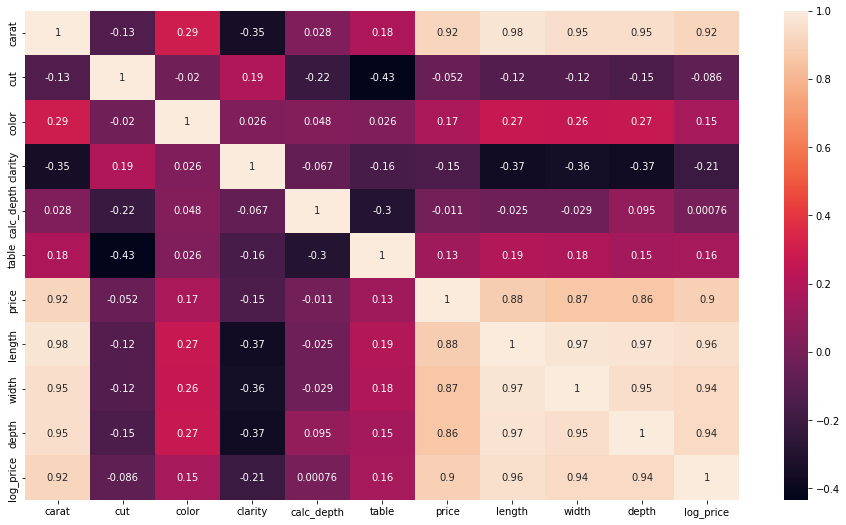

In [25]:
plt.figure(figsize=(16, 9))
sns.heatmap(df_final.corr(), annot=True)
plt.show()

In [26]:
df_final.head()

,carat,cut,color,clarity,calc_depth,table,price,length,width,depth,log_price
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43,8.353147
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31,8.353147
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31,8.357552
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63,8.388017
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75,8.392317


In [27]:
df_scal = df_final.copy()

In [28]:
df_scal.head()

,carat,cut,color,clarity,calc_depth,table,price,length,width,depth,log_price
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43,8.353147
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31,8.353147
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31,8.357552
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63,8.388017
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75,8.392317


## Model Building

### Extract X and y from dataset

In [29]:
X = df_scal.drop(columns=['price','log_price'], axis=1)
y = df_scal['log_price']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
X_train


,carat,cut,color,clarity,calc_depth,table,length,width,depth
33544,0.35,5,1,4,62.0,55.0,4.47,4.53,2.79
26752,2.21,5,1,2,62.0,57.0,8.36,8.31,5.18
45914,0.53,5,2,4,60.0,57.0,5.24,5.30,3.16
3071,0.80,4,1,3,61.7,58.0,5.96,5.93,3.67
43829,0.41,5,2,7,61.5,56.0,4.81,4.82,2.96
...,...,...,...,...,...,...,...,...,...
11311,1.00,4,5,4,60.4,58.0,6.51,6.46,3.92
44869,0.63,5,4,3,61.7,54.0,5.52,5.56,3.42
38271,0.32,5,7,3,61.8,54.9,4.39,4.42,2.72
860,0.90,4,7,3,62.8,59.0,6.13,6.03,3.82


### Data scalling step

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [34]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [35]:
X_train_scaled

array([[-0.94345735,  0.98373539, -1.52418638, ..., -1.1223499 ,
        -1.04690326, -1.07495192],
       [ 2.96422154,  0.98373539, -1.52418638, ...,  2.33490736,
         2.23305697,  2.3538824 ],
       [-0.56529488,  0.98373539, -0.93667968, ..., -0.43800849,
        -0.37876321, -0.5441282 ],
       ...,
       [-1.00648443,  0.98373539,  2.00085384, ..., -1.19345031,
        -1.14235183, -1.17537803],
       [ 0.2120391 ,  0.08596941,  2.00085384, ...,  0.35298353,
         0.25466826,  0.40274655],
       [ 0.44313838,  0.08596941,  0.23833373, ...,  0.5573972 ,
         0.49762828,  0.61794536]])

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [37]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
knn = KNeighborsRegressor(n_neighbors=3)
svc = SVR()

First check for Linear Model only

In [38]:
m_lr = lr.fit(X_train_scaled, y_train)

In [39]:
m_lr.score(X_test_scaled, y_test)

0.9690586201277273

In [40]:
X_test.columns

Index(['carat', 'cut', 'color', 'clarity', 'calc_depth', 'table', 'length',
       'width', 'depth'],
      dtype='object')

In [41]:
y_pred_lr = lr.predict(X_test_scaled)

In [42]:
y_pred_lr

array([10.82646596, 11.63074961, 10.85072843, ...,  9.91091106,
       13.58292574, 10.21687364])

In [43]:
y_test

43657    10.487840
4274     11.807757
47412    10.854868
44437    10.635718
13975    12.474466
           ...    
41789    10.287712
43542    10.480790
35783     9.834471
25885    13.872963
39329    10.066089
Name: log_price, Length: 10759, dtype: float64

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cross_val_score(lr, X_test_scaled, y_test).mean()*100

97.1599068414854

Now build other models for better accuracy

In [46]:
m_dtr = dtr.fit(X_train_scaled, y_train)
m_rfr = rfr.fit(X_train_scaled, y_train)
m_knn = knn.fit(X_train_scaled, y_train)
m_svc = svc.fit(X_train_scaled, y_train)

In [47]:
# accuracy of all the models
m_dtr.score(X_test_scaled, y_test), m_rfr.score(X_test_scaled, y_test), m_knn.score(X_test_scaled, y_test), m_svc.score(X_test_scaled, y_test)

(0.9839247323317073, 0.991788633305101, 0.9804408146753394, 0.9891417709470881)

In [48]:
# Cross validation score of all the models 
cross_val_score(m_dtr, X_test_scaled, y_test).mean()*100, cross_val_score(m_rfr, X_test_scaled, y_test).mean()*100, cross_val_score(m_knn, X_test_scaled, y_test).mean()*100, cross_val_score(m_svc, X_test_scaled, y_test).mean()*100

(97.96630727672202, 98.93793088154939, 97.26874348878445, 98.66428080291338)

In [49]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [50]:
y_pred_dtr = m_dtr.predict(X_test_scaled)
y_pred_rfr = m_rfr.predict(X_test_scaled)
y_pred_knn = m_knn.predict(X_test_scaled)
y_pred_svc = m_svc.predict(X_test_scaled)

In [51]:
y_pred_dtr, y_pred_rfr, y_pred_knn

(array([10.83526092, 11.86920825, 10.85486838, ...,  9.76155123,
        13.90350531, 10.02928723]),
 array([10.85241411, 11.85153658, 10.86915312, ...,  9.77273793,
        13.84342047, 10.03278622]),
 array([10.87088691, 11.94331086, 10.87646937, ...,  9.74902466,
        13.83098495,  9.82591671]))

In [52]:
y_test

43657    10.487840
4274     11.807757
47412    10.854868
44437    10.635718
13975    12.474466
           ...    
41789    10.287712
43542    10.480790
35783     9.834471
25885    13.872963
39329    10.066089
Name: log_price, Length: 10759, dtype: float64

### Errors and r2 score of models

In [53]:
print("MSE of Dicision tree regressor is", metrics.mean_squared_error(y_test, y_pred_dtr)), 
print("MSE of Random Forest regressor is", metrics.mean_squared_error(y_test, y_pred_rfr)), 
print("MSE of KNeighbour regressor is", metrics.mean_squared_error(y_test, y_pred_knn)),
print("MSE of KNeighbour regressor is", metrics.mean_squared_error(y_test, y_pred_svc))

MSE of Dicision tree regressor is 0.03351755899939149
MSE of Random Forest regressor is 0.017121019278875084
MSE of KNeighbour regressor is 0.04078166296368568
MSE of KNeighbour regressor is 0.02263983035428574


In [54]:
print("MAE of Dicision tree regressor is", metrics.mean_absolute_error(y_test, y_pred_dtr)), 
print("MAE of Random Forest regressor is", metrics.mean_absolute_error(y_test, y_pred_rfr)), 
print("MAE of KNeighbour regressor is", metrics.mean_absolute_error(y_test, y_pred_knn)),
print("MAE of KNeighbour regressor is", metrics.mean_absolute_error(y_test, y_pred_svc))

MAE of Dicision tree regressor is 0.12301171047817112
MAE of Random Forest regressor is 0.0911614431358838
MAE of KNeighbour regressor is 0.148375148670897
MAE of KNeighbour regressor is 0.11285533527957786


In [55]:
r2_lr = r2_score(y_test, y_pred_lr),
r2_rfr =  r2_score(y_test, y_pred_rfr),
r2_dtr =  r2_score(y_test, y_pred_dtr),
r2_knn =  r2_score(y_test, y_pred_knn),
r2_svc =  r2_score(y_test, y_pred_svc)

In [56]:
r2_lr[0]

0.9690586201277273

In [57]:
r2_rfr[0]

0.991788633305101

In [58]:
r2_dtr[0]

0.9839247323317073

In [59]:
r2_knn

(0.9804408146753394,)

In [60]:
r2_svc 

0.9891417709470881

### Adjusted r2 score of all the models

In [61]:
adj_r2_lr = 1-((1-r2_lr[0])*(43154-1)/(43154-1-9))

In [62]:
adj_r2_rfr = 1-((1-r2_rfr[0])*(43154-1)/(43154-1-9))


In [63]:
adj_r2_dtr = 1-((1-r2_dtr[0])*(43154-1)/(43154-1-9))

In [65]:
adj_r2_svc = 1-((1-r2_svc)*(43154-1)/(43154-1-9))

In [66]:
adj_r2_rfr

0.991786920383252

In [68]:
adj_r2_knn = 1-((1-r2_knn[0])*(43154-1)/(43154-1-9))

In [69]:
adj_r2_rfr, adj_r2_dtr, adj_r2_knn, adj_r2_svc

(0.991786920383252, 0.9839213789706602, 0.9804367345560199, 0.9891395058798371)

In [70]:
r2_rfr, r2_dtr, r2_knn, r2_svc

((0.991788633305101,),
 (0.9839247323317073,),
 (0.9804408146753394,),
 0.9891417709470881)

## We can see the graph of **prediction Vs actual** values

C:\Users\INDIA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


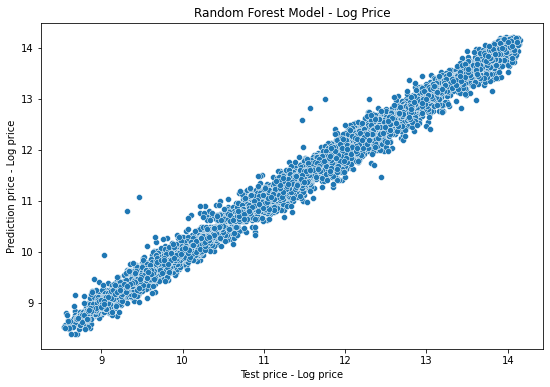

In [71]:
plt.figure(figsize=(9,6))
sns.scatterplot(y_pred_rfr, y_test)
plt.title('Random Forest Model - Log Price')
plt.ylabel('Prediction price - Log price')
plt.xlabel('Test price - Log price')
plt.show()

C:\Users\INDIA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


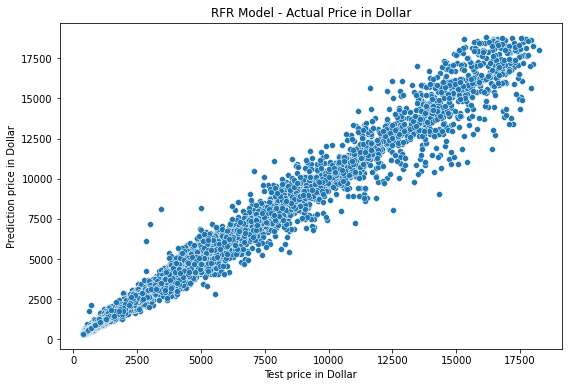

In [72]:
plt.figure(figsize=(9,6))
sns.scatterplot(2**y_pred_rfr, 2**y_test)
plt.title('RFR Model - Actual Price in Dollar')
plt.ylabel('Prediction price in Dollar')
plt.xlabel('Test price in Dollar')
plt.show()

C:\Users\INDIA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


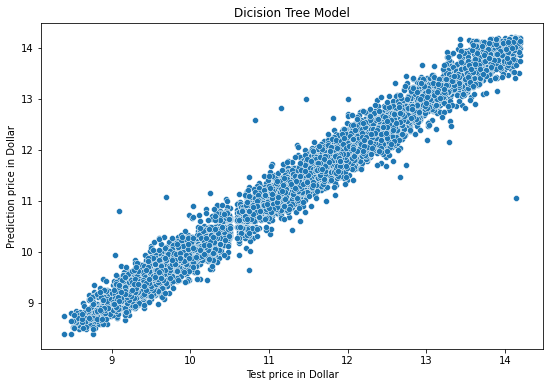

In [73]:
plt.figure(figsize=(9,6))
sns.scatterplot(y_pred_dtr, y_test)
plt.title('Dicision Tree Model')
plt.ylabel('Prediction price in Dollar')
plt.xlabel('Test price in Dollar')
plt.show()

C:\Users\INDIA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


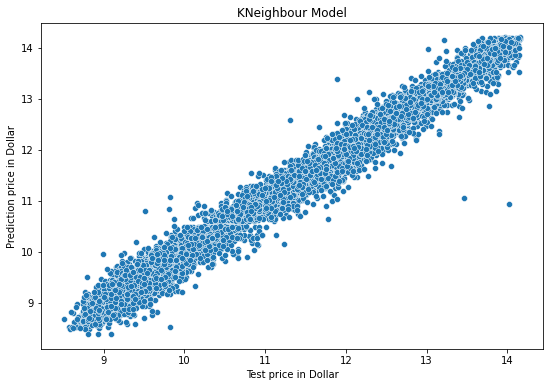

In [74]:
plt.figure(figsize=(9,6))
sns.scatterplot(y_pred_knn, y_test)
plt.title('KNeighbour Model')
plt.ylabel('Prediction price in Dollar')
plt.xlabel('Test price in Dollar')
plt.show()

C:\Users\INDIA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


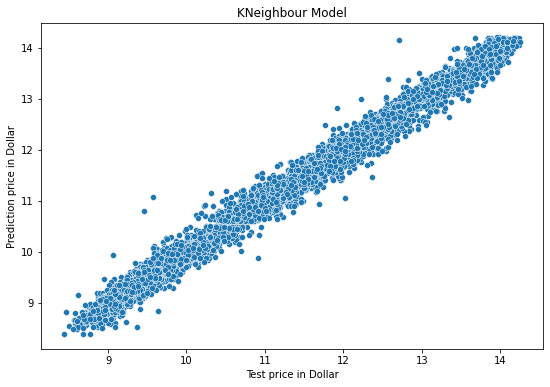

In [75]:
plt.figure(figsize=(9,6))
sns.scatterplot(y_pred_svc, y_test)
plt.title('KNeighbour Model')
plt.ylabel('Prediction price in Dollar')
plt.xlabel('Test price in Dollar')
plt.show()

In [76]:
# From graph its clear that random forest gives more accurate result than all of other models 

In [80]:
details = pd.DataFrame({'Model':['Linear', 'DT', 'RF', 'KNN', 'SVC'], 'Accuracy':[(m_lr.score(X_test_scaled, y_test))*100, (m_dtr.score(X_test_scaled, y_test))*100, (m_rfr.score(X_test_scaled, y_test))*100, (m_knn.score(X_test_scaled, y_test)*100), (m_svc.score(X_test_scaled, y_test))*100],
                       'val_score':[cross_val_score(m_lr, X_test_scaled, y_test).mean()*100, cross_val_score(m_dtr, X_test_scaled, y_test).mean()*100, cross_val_score(m_rfr, X_test_scaled, y_test).mean()*100, cross_val_score(m_knn, X_test_scaled, y_test).mean()*100, cross_val_score(m_knn, X_test_scaled, y_test).mean()*100],
                       'MAE':[metrics.mean_absolute_error(y_test, y_pred_lr), metrics.mean_absolute_error(y_test, y_pred_dtr), metrics.mean_absolute_error(y_test, y_pred_rfr), metrics.mean_absolute_error(y_test, y_pred_knn), metrics.mean_absolute_error(y_test, y_pred_svc)],
                       'r2_score':[r2_lr[0], r2_rfr[0], r2_dtr[0], r2_knn[0], r2_svc],
                       'adjusted r2_score':[adj_r2_lr, adj_r2_rfr, adj_r2_dtr, adj_r2_knn, adj_r2_svc]}) 

In [81]:
details

,Model,Accuracy,val_score,MAE,r2_score,adjusted r2_score
0,Linear,96.905862,97.159907,0.175157,0.969059,0.969052
1,DT,98.392473,97.951465,0.123012,0.991789,0.991787
2,RF,99.178863,98.938910,0.091161,0.983925,0.983921
3,KNN,98.044081,97.268743,0.148375,0.980441,0.980437
4,SVC,98.914177,97.268743,0.112855,0.989142,0.989140


In [82]:
# From above table its clear that **Random Forest** model gives best result for accuracy, val_score, MAE error, r2_score and adjusted r2_score.

In [83]:
# import pickle

In [84]:
# pickle.dump(m_rfr, open('model1.pkl', 'wb'))

In [85]:
# pickle.dump(sc, open('scaler10.pkl', 'wb'))